In [196]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [197]:
import numpy as np
import pandas as pd

In [198]:
import datetime as dt

In [199]:
##Reflect Tables into SQLAlchemy ORM

In [200]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, MetaData, Table, Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
base = declarative_base()

In [201]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#engine = create_engine("http://localhost:8889/edit/Downloads/Adv_SQL_homework/hawaii.sqlite")

In [202]:
# reflect an existing database into a new model
meta=MetaData(engine)
Base = automap_base(bind=engine, metadata=meta)
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [203]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [204]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [205]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [206]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [207]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Precipitation Analysis

In [208]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [209]:
# Calculate the date 1 year ago from the last data point in the database

last_12month_precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').order_by(Measurement.date).all()
last_12month_precipitation

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

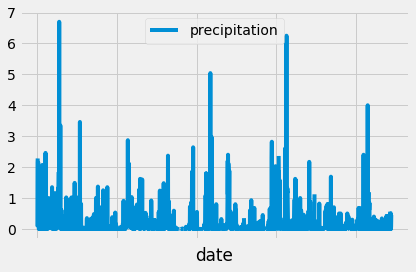

In [210]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

df = pd.DataFrame(last_12month_precipitation, columns=['date','precipitation'])
df.set_index('date', inplace=True)
df.plot.line()
plt.tight_layout()
plt.show()

In [211]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [212]:
# Design a query to show how many stations are available in this dataset?
number_of_stations = session.query(Measurement.tobs, Measurement.station).all()
df_stations = pd.DataFrame ([(d.tobs,d.station) for d in number_of_stations], columns=['Temp', 'Station'])
df_stations
df_stations['Station'].nunique()

9

In [213]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = df_stations.groupby('Station').count()
station_list = station_activity.sort_values('Temp', ascending=False)
station_list


,Temp
Station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [214]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_variables = [Measurement.station,
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)]
temps = session.query(*temp_variables).filter(Measurement.station == 'USC00519281').all()        
temps

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

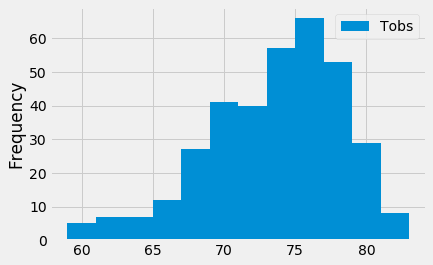

In [226]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year=dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_year
most_active_station_12_months = session.query(Measurement.tobs).filter(Measurement.date>=last_year).\
filter(Measurement.station=='USC00519281').all()


#pd.DataFrame(most_active_station_12_months)
most_active_station_12_months=pd.DataFrame([d[0]for d in most_active_station_12_months], columns=['Tobs'])
most_active_station_12_months.plot.hist(by='Temp', bins = 12)
plt.show()
